# Projeto Final 

### Objetivo

- Analisar a região que é mais propensa a ser alugada para agências de turismo que tiverem o interesse de saber essa informação
- Fazer pacotes de viagens relacionados aos critérios do cliente (família, amigos, casal...)
    - cliente, serviço, pagamento

### Importando Bibliotecas

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Carregando o Dataset

In [2]:
df = pd.read_csv('dataset.csv')

In [3]:
df

,City,Price,Day,Room Type,Shared Room,Private Room,Person Capacity,Superhost,Multiple Rooms,Business,Cleanliness Rating,Guest Satisfaction,Bedrooms,City Center (km),Metro Distance (km),Attraction Index,Normalised Attraction Index,Restraunt Index,Normalised Restraunt Index
0,Amsterdam,194.033698,Weekday,Private room,False,True,2.0,False,1,0,10.0,93.0,1,5.022964,2.539380,78.690379,4.166708,98.253896,6.846473
1,Amsterdam,344.245776,Weekday,Private room,False,True,4.0,False,0,0,8.0,85.0,1,0.488389,0.239404,631.176378,33.421209,837.280757,58.342928
2,Amsterdam,264.101422,Weekday,Private room,False,True,2.0,False,0,1,9.0,87.0,1,5.748312,3.651621,75.275877,3.985908,95.386955,6.646700
3,Amsterdam,433.529398,Weekday,Private room,False,True,4.0,False,0,1,9.0,90.0,2,0.384862,0.439876,493.272534,26.119108,875.033098,60.973565
4,Amsterdam,485.552926,Weekday,Private room,False,True,2.0,True,0,0,10.0,98.0,1,0.544738,0.318693,552.830324,29.272733,815.305740,56.811677
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41709,Vienna,715.938574,Weekend,Entire home/apt,False,False,6.0,False,0,1,10.0,100.0,3,0.530181,0.135447,219.402478,15.712158,438.756874,10.604584
41710,Vienna,304.793960,Weekend,Entire home/apt,False,False,2.0,False,0,0,8.0,86.0,1,0.810205,0.100839,204.970121,14.678608,342.182813,8.270427
41711,Vienna,637.168969,Weekend,Entire home/apt,False,False,2.0,False,0,0,10.0,93.0,1,0.994051,0.202539,169.073402,12.107921,282.296424,6.822996
41712,Vienna,301.054157,Weekend,Private room,False,True,2.0,False,0,0,10.0,87.0,1,3.044100,0.287435,109.236574,7.822803,158.563398,3.832416


### Banco de Dados

### Machine Learning

#### Análise Exploratória

In [4]:
#tamanho do dataframe
df.shape

(41714, 19)

In [5]:
#colunas
df.columns

Index(['City', 'Price', 'Day', 'Room Type', 'Shared Room', 'Private Room',
       'Person Capacity', 'Superhost', 'Multiple Rooms', 'Business',
       'Cleanliness Rating', 'Guest Satisfaction', 'Bedrooms',
       'City Center (km)', 'Metro Distance (km)', 'Attraction Index',
       'Normalised Attraction Index', 'Restraunt Index',
       'Normalised Restraunt Index'],
      dtype='object')

In [6]:
#informações
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41714 entries, 0 to 41713
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   City                         41714 non-null  object 
 1   Price                        41714 non-null  float64
 2   Day                          41714 non-null  object 
 3   Room Type                    41714 non-null  object 
 4   Shared Room                  41714 non-null  bool   
 5   Private Room                 41714 non-null  bool   
 6   Person Capacity              41714 non-null  float64
 7   Superhost                    41714 non-null  bool   
 8   Multiple Rooms               41714 non-null  int64  
 9   Business                     41714 non-null  int64  
 10  Cleanliness Rating           41714 non-null  float64
 11  Guest Satisfaction           41714 non-null  float64
 12  Bedrooms                     41714 non-null  int64  
 13  City Center (km)

In [7]:
#há valores ausentes?
df.isnull().sum()

City                           0
Price                          0
Day                            0
Room Type                      0
Shared Room                    0
Private Room                   0
Person Capacity                0
Superhost                      0
Multiple Rooms                 0
Business                       0
Cleanliness Rating             0
Guest Satisfaction             0
Bedrooms                       0
City Center (km)               0
Metro Distance (km)            0
Attraction Index               0
Normalised Attraction Index    0
Restraunt Index                0
Normalised Restraunt Index     0
dtype: int64

In [8]:
#resumo estatístico
df.describe()

,Price,Person Capacity,Multiple Rooms,Business,Cleanliness Rating,Guest Satisfaction,Bedrooms,City Center (km),Metro Distance (km),Attraction Index,Normalised Attraction Index,Restraunt Index,Normalised Restraunt Index
count,41714.000000,41714.000000,41714.000000,41714.000000,41714.000000,41714.000000,41714.000000,41714.000000,41714.000000,41714.000000,41714.000000,41714.000000,41714.000000
mean,260.094423,3.237235,0.295273,0.341180,9.442274,93.103179,1.165939,2.679792,0.603921,293.905990,11.719658,626.692618,25.553590
std,279.408493,1.299459,0.456171,0.474112,0.889173,8.141745,0.638157,1.996684,0.706206,235.750055,8.379161,520.644720,18.484572
min,34.779339,2.000000,0.000000,0.000000,2.000000,20.000000,0.000000,0.015045,0.002301,15.152201,0.926301,19.576924,0.592757
25%,144.016085,2.000000,0.000000,0.000000,9.000000,90.000000,1.000000,1.275913,0.236693,124.371614,5.510735,210.459574,11.132052
50%,203.819274,3.000000,0.000000,0.000000,10.000000,95.000000,1.000000,2.253237,0.391220,228.920599,9.951086,519.583509,21.814414
75%,297.373358,4.000000,1.000000,1.000000,10.000000,98.000000,1.000000,3.584489,0.678702,394.000201,15.467009,860.708156,36.821356
max,18545.450285,6.000000,1.000000,1.000000,10.000000,100.000000,10.000000,25.284557,14.273577,4513.563486,100.000000,6696.156772,100.000000


#### Histogramas - visualização da distribuição dos dados numéricos

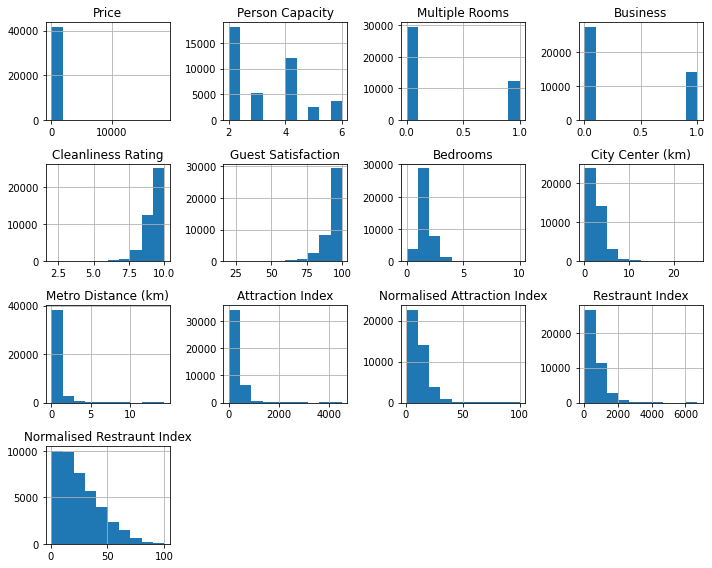

In [9]:
#não precisamos usar esses gráficos pq ta meio feio, mas acho legal a gente usar pra analisar
df.hist(figsize=(10, 8))
plt.tight_layout()
plt.show()

#### Variável Alvo

In [10]:
#resumo da variável alvo
df['Price'].describe()

count    41714.000000
mean       260.094423
std        279.408493
min         34.779339
25%        144.016085
50%        203.819274
75%        297.373358
max      18545.450285
Name: Price, dtype: float64

In [11]:
#média da variável alvo
np.mean(df['Price'])

260.09442261413653

In [12]:
#desvio padrão da variável alvo
np.std(df['Price'])

279.4051437480038

<Axes: >

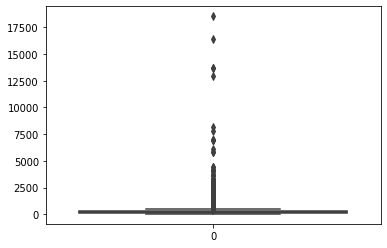

In [13]:
#gráfico de caixa para visualização dos outliers da variável alvo
sns.boxplot(df['Price'])

In [14]:
#identificando os outliers da variável alvo
upper = np.where(df['Price'] > 2500)
upper

(array([    7,    99,   133,   158,   253,   970,  1107,  1197,  1232,
         1259,  1333,  1962,  3590,  8424,  8425,  8708,  9409,  9416,
         9813,  9814, 10034, 11278, 12499, 14615, 16057, 22693, 22936,
        23503, 24810, 25228, 25359, 25548, 25848, 26090, 26752, 26891,
        28788, 29099, 38222, 38387, 40794], dtype=int64),)

In [15]:
#removendo os outliers da variável alvo
df.drop(upper[0], inplace = True)

<Axes: >

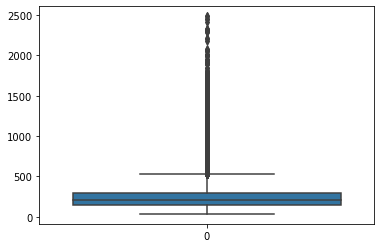

In [16]:
sns.boxplot(df['Price'])

In [17]:
df.shape

(41673, 19)

In [18]:
df.head()

,City,Price,Day,Room Type,Shared Room,Private Room,Person Capacity,Superhost,Multiple Rooms,Business,Cleanliness Rating,Guest Satisfaction,Bedrooms,City Center (km),Metro Distance (km),Attraction Index,Normalised Attraction Index,Restraunt Index,Normalised Restraunt Index
0,Amsterdam,194.033698,Weekday,Private room,False,True,2.0,False,1,0,10.0,93.0,1,5.022964,2.539380,78.690379,4.166708,98.253896,6.846473
1,Amsterdam,344.245776,Weekday,Private room,False,True,4.0,False,0,0,8.0,85.0,1,0.488389,0.239404,631.176378,33.421209,837.280757,58.342928
2,Amsterdam,264.101422,Weekday,Private room,False,True,2.0,False,0,1,9.0,87.0,1,5.748312,3.651621,75.275877,3.985908,95.386955,6.646700
3,Amsterdam,433.529398,Weekday,Private room,False,True,4.0,False,0,1,9.0,90.0,2,0.384862,0.439876,493.272534,26.119108,875.033098,60.973565
4,Amsterdam,485.552926,Weekday,Private room,False,True,2.0,True,0,0,10.0,98.0,1,0.544738,0.318693,552.830324,29.272733,815.305740,56.811677


#### Correlação entre as Variáveis

In [19]:
#!!!!!

In [54]:
data = df.drop(columns = ['City', 'Day', 'Room Type'])

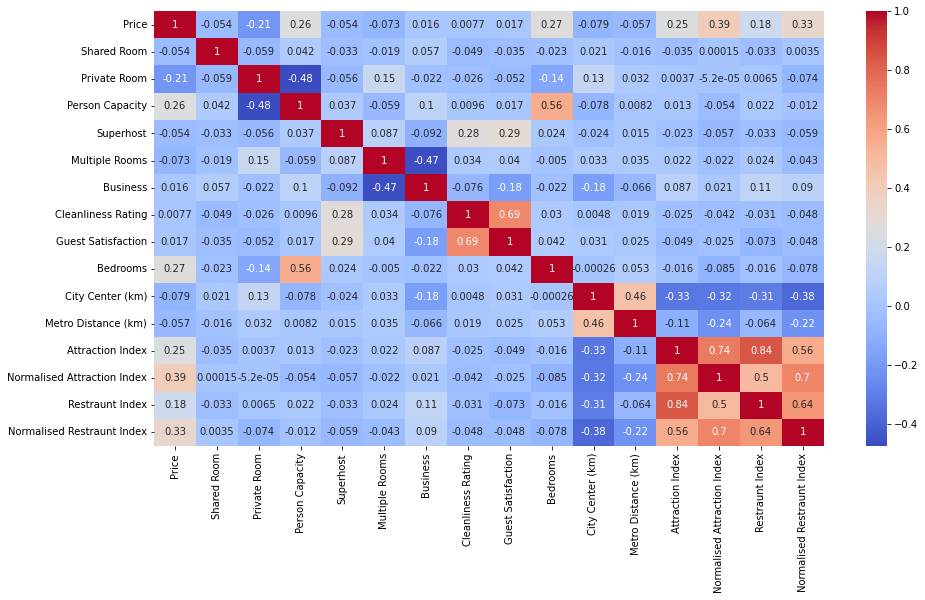

In [55]:
correlacao = data.corr()
plt.figure(figsize=(15, 8))
sns.heatmap(correlacao, annot=True, cmap="coolwarm")
plt.show()

#### Análise das Categorias

Preço x Cidade

In [21]:
media_por_cidade = df[['City', 'Price']].groupby('City').mean().sort_values(by = 'Price', ascending = False).reset_index()
media_por_cidade

,City,Price
0,Amsterdam,554.747087
1,Paris,384.613510
2,Barcelona,278.392947
3,Berlin,240.061433
4,Lisbon,238.210479
5,Vienna,230.394338
6,Rome,205.391950
7,Budapest,174.765069
8,Athens,148.259805


<Axes: xlabel='Price', ylabel='City'>

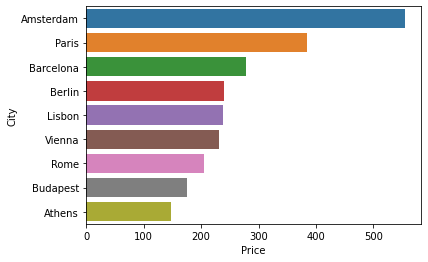

In [22]:
sns.barplot(data = media_por_cidade, x = 'Price', y = 'City')

Preço x Dia

In [23]:
media_por_dia = df[['Day', 'Price']].groupby('Day').mean().sort_values(by = 'Price', ascending = False).reset_index()
media_por_dia

,Day,Price
0,Weekend,258.920999
1,Weekday,250.922088


<Axes: xlabel='Day', ylabel='Price'>

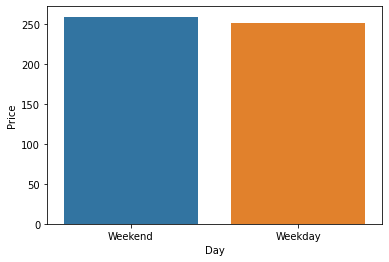

In [24]:
sns.barplot(data = media_por_dia, x = 'Day', y = 'Price')

Preco x Tipo de Quarto

In [25]:
media_por_tipo_quarto = df[['Room Type', 'Price']].groupby('Room Type').mean().sort_values(by = 'Price', ascending = False).reset_index()
media_por_tipo_quarto

,Room Type,Price
0,Entire home/apt,283.477226
1,Private room,196.346224
2,Shared room,137.829673


<Axes: xlabel='Room Type', ylabel='Price'>

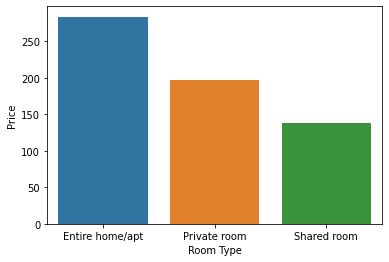

In [26]:
sns.barplot(data = media_por_tipo_quarto, x = 'Room Type', y = 'Price')

Preço X Quarto Compartilhado

In [27]:
media_por_compartilhamento = df[['Shared Room', 'Price']].groupby('Shared Room').mean().sort_values(by = 'Price', ascending = False).reset_index()
media_por_compartilhamento

,Shared Room,Price
0,False,255.810705
1,True,137.829673


<Axes: xlabel='Shared Room', ylabel='Price'>

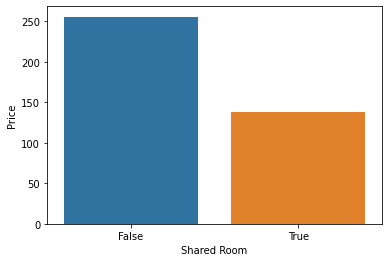

In [28]:
sns.barplot(data = media_por_compartilhamento, x = 'Shared Room', y = 'Price')

Preço x Capacidade de Pessoas

In [29]:
media_por_capacidade = df[['Person Capacity', 'Price']].groupby('Person Capacity').mean().sort_values(by = 'Price', ascending = False).reset_index()
media_por_capacidade

,Person Capacity,Price
0,6.0,371.037858
1,5.0,299.261527
2,4.0,288.595220
3,3.0,217.349118
4,2.0,214.164894


<Axes: xlabel='Person Capacity', ylabel='Price'>

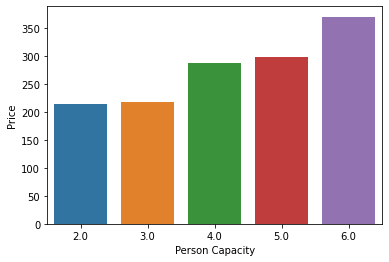

In [30]:
sns.barplot(data = media_por_capacidade, x = 'Person Capacity', y = 'Price')

Preço x Limpeza

In [31]:
media_por_limpeza = df[['Cleanliness Rating', 'Price']].groupby('Cleanliness Rating').mean().sort_values(by = 'Price', ascending = False).reset_index()
media_por_limpeza

,Cleanliness Rating,Price
0,4.0,285.861451
1,6.0,270.220705
2,10.0,256.355591
3,8.0,254.460543
4,9.0,252.598931
5,7.0,243.062504
6,2.0,237.389636
7,3.0,196.179365
8,5.0,171.751768


<Axes: xlabel='Cleanliness Rating', ylabel='Price'>

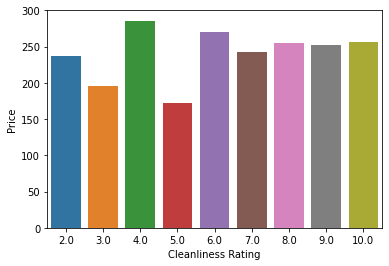

In [32]:
sns.barplot(data = media_por_limpeza, x = 'Cleanliness Rating', y = 'Price')

Preço x Satisfação

In [33]:
media_por_satisfacao = df[['Guest Satisfaction', 'Price']].groupby('Guest Satisfaction').mean().sort_values(by = 'Price', ascending = False).reset_index()
media_por_satisfacao = media_por_satisfacao.loc[:10]
media_por_satisfacao

,Guest Satisfaction,Price
0,64.0,568.569968
1,57.0,378.345555
2,65.0,335.942646
3,53.0,325.369270
4,54.0,319.126552
5,50.0,311.555091
6,63.0,298.079019
7,47.0,292.451144
8,60.0,284.250382
9,100.0,277.118738


<Axes: xlabel='Guest Satisfaction', ylabel='Price'>

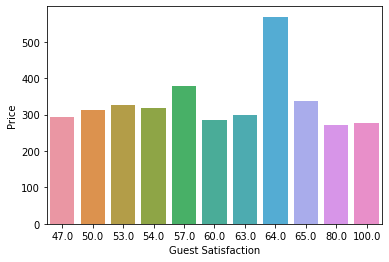

In [34]:
sns.barplot(data = media_por_satisfacao, x = 'Guest Satisfaction', y = 'Price')

Preço x Quantidade de Quartos

In [35]:
media_por_quartos = df[['Bedrooms', 'Price']].groupby('Bedrooms').mean().sort_values(by = 'Price', ascending = False).reset_index()
media_por_quartos

,Bedrooms,Price
0,5,923.640787
1,4,675.163549
2,3,487.002650
3,2,334.870638
4,0,239.056261
5,1,224.276120
6,9,148.064646
7,10,77.743902


<Axes: xlabel='Bedrooms', ylabel='Price'>

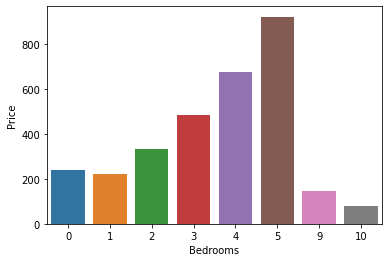

In [36]:
sns.barplot(data = media_por_quartos, x = 'Bedrooms', y = 'Price')

Preço x Distância do Metrô

<Axes: xlabel='Price', ylabel='Metro Distance (km)'>

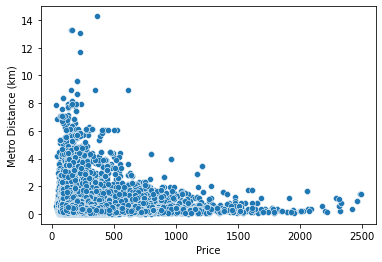

In [37]:
sns.scatterplot(data = df, x = 'Price', y = 'Metro Distance (km)')

Preço x Distância do Centro da Cidade

<Axes: xlabel='Price', ylabel='City Center (km)'>

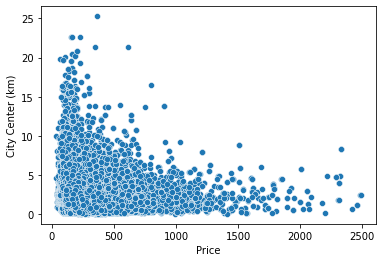

In [38]:
sns.scatterplot(data = df, x = 'Price', y = 'City Center (km)')

#### Relação entre as Categorias e Variáveis Numéricas

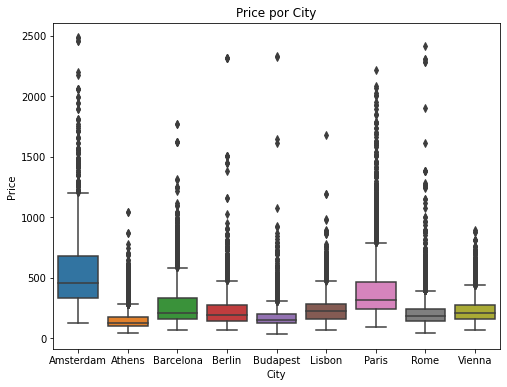

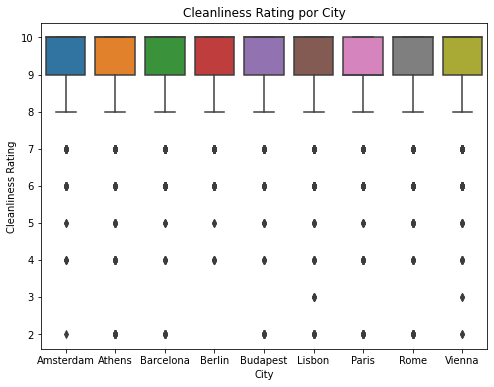

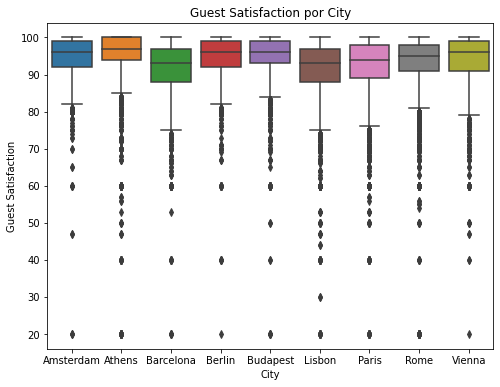

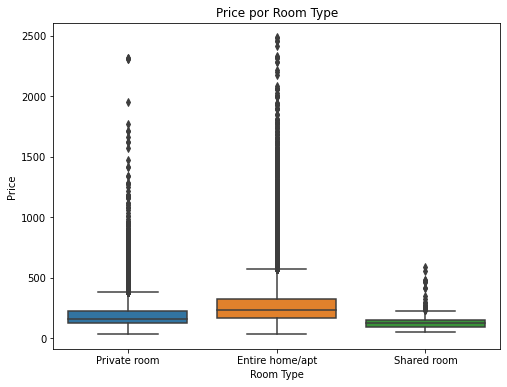

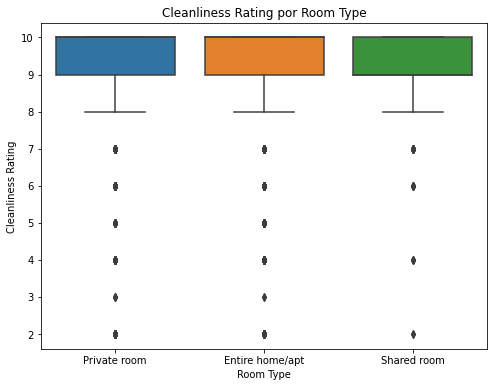

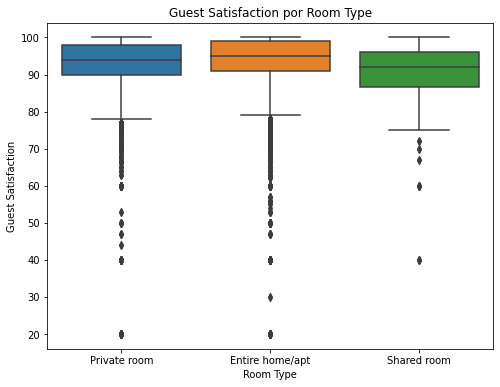

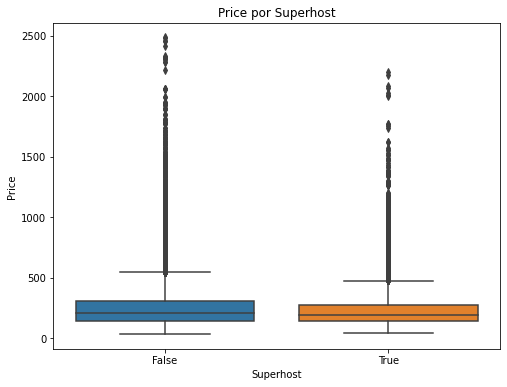

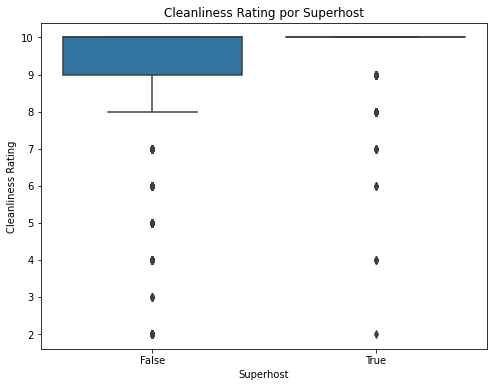

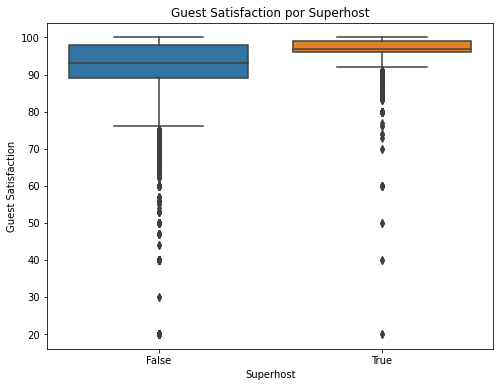

In [39]:
#analisar a relação entre as categorias e variáveis numéricas com gráficos de caixa
#exemplo
categorical_columns = ['City', 'Room Type', 'Superhost']
numeric_columns = ['Price', 'Cleanliness Rating', 'Guest Satisfaction']

for cat_column in categorical_columns:
    for num_column in numeric_columns:
        plt.figure(figsize=(8, 6))
        sns.boxplot(x=cat_column, y=num_column, data=df)
        plt.title(f'{num_column} por {cat_column}')
        plt.show()